In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/competition_data.csv")

In [3]:
df.columns

Index(['accepts_mercadopago', 'available_quantity',
       'avg_gmv_item_domain_30days', 'avg_gmv_item_sel', 'avg_gmv_seller_bday',
       'avg_qty_orders_item_domain_30days', 'avg_qty_orders_item_sel_30days',
       'avg_si_item_sel_30day', 'benefit', 'boosted', 'category_id',
       'conversion', 'date', 'deal_print_id', 'domain_id', 'etl_version',
       'free_shipping', 'fulfillment', 'full_name', 'health', 'is_pdp',
       'product_id', 'item_id', 'listing_type_id', 'logistic_type',
       'main_picture', 'offset', 'original_price', 'platform', 'price',
       'print_position', 'print_server_timestamp', 'qty_items_dom',
       'qty_items_sel', 'site_id', 'sold_quantity', 'tags', 'title',
       'total_asp_item_domain_30days', 'total_asp_item_sel_30days',
       'total_gmv_domain_bday', 'total_gmv_item_30days', 'total_items_domain',
       'total_items_seller', 'total_orders_domain_30days',
       'total_orders_item_30days', 'total_orders_sel_30days',
       'total_si_domain_30days

In [4]:
df['platform'] = df['platform'].str.split('/').str[2]

C:\Users\gaston\AppData\Local\Temp\ipykernel_7680\1855239361.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='platform', y='conversion', ci=None, palette='Set2')


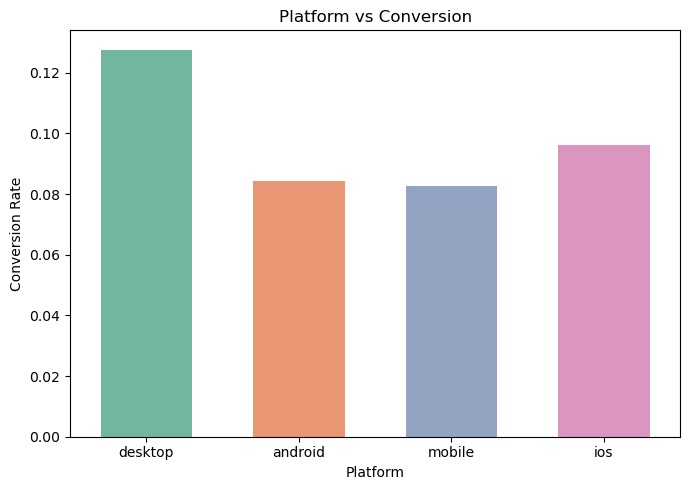

In [19]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='platform', y='conversion', ci=None, palette='Set2')

plt.title('Platform vs Conversion')
plt.xlabel('Platform')
plt.ylabel('Conversion Rate')

bar_width = 0.6 
for bar in plt.gca().patches:
    x = bar.get_x() + (bar.get_width() - bar_width) / 2
    bar.set_x(x)
    bar.set_width(bar_width)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

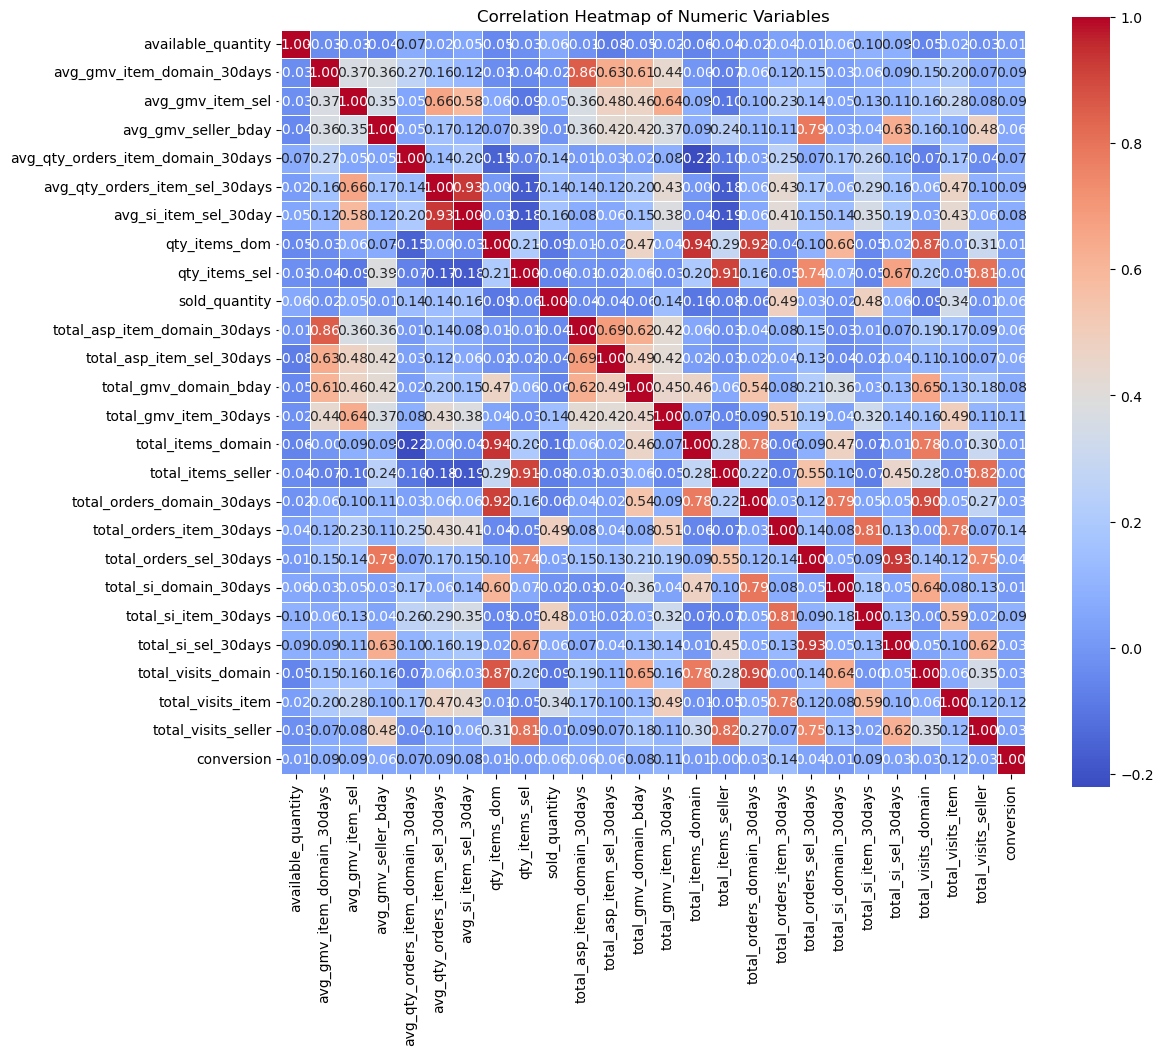

In [27]:
numeric_columns = ['available_quantity', 'avg_gmv_item_domain_30days', 'avg_gmv_item_sel', 'avg_gmv_seller_bday', 
                   'avg_qty_orders_item_domain_30days', 'avg_qty_orders_item_sel_30days', 'avg_si_item_sel_30day', 
                   'qty_items_dom', 'qty_items_sel', 'sold_quantity', 'total_asp_item_domain_30days', 
                   'total_asp_item_sel_30days', 'total_gmv_domain_bday', 'total_gmv_item_30days', 'total_items_domain', 
                   'total_items_seller', 'total_orders_domain_30days', 'total_orders_item_30days', 
                   'total_orders_sel_30days', 'total_si_domain_30days', 'total_si_item_30days', 
                   'total_si_sel_30days', 'total_visits_domain', 'total_visits_item', 'total_visits_seller','conversion']

# Create a correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5)

# Set plot title
plt.title('Correlation Heatmap of Numeric Variables')

# Show the plot
plt.show()

In [21]:
df['date'] = pd.to_datetime(df['print_server_timestamp'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['second'] = df['date'].dt.second

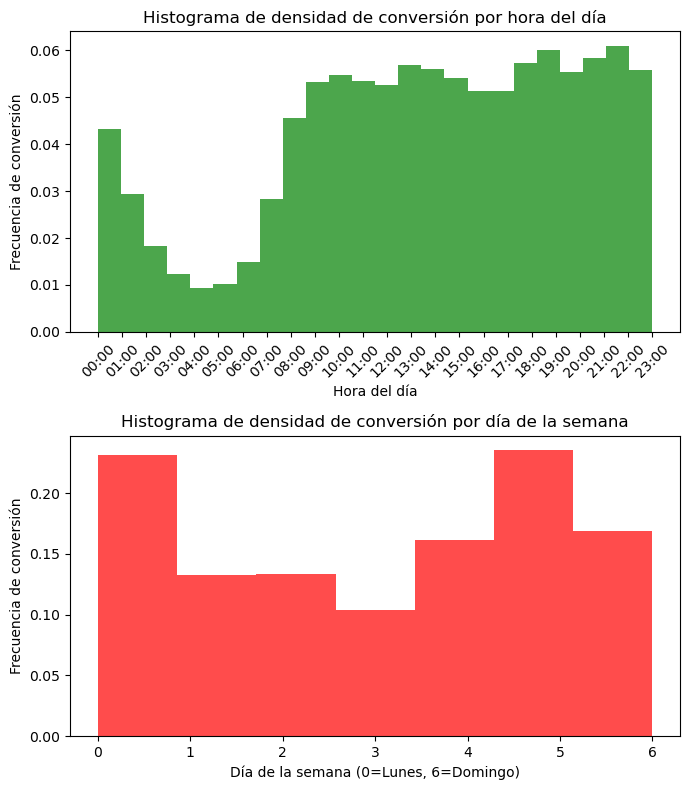

In [31]:
plt.figure(figsize=(7, 8))

plt.subplot(2, 1, 1)
plt.hist(df['hour'], bins=24, color='g', alpha=0.7, density=True)
plt.title('Histograma de densidad de conversión por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia de conversión')

plt.xticks(range(24), [f"{hour:02}:00" for hour in range(24)], rotation=45)

plt.subplot(2, 1, 2)
plt.hist(df['day_of_week'], bins=7, color='r', alpha=0.7, density=True)
plt.title('Histograma de densidad de conversión por día de la semana')
plt.xlabel('Día de la semana (0=Lunes, 6=Domingo)')
plt.ylabel('Frecuencia de conversión')

plt.tight_layout()
plt.show()

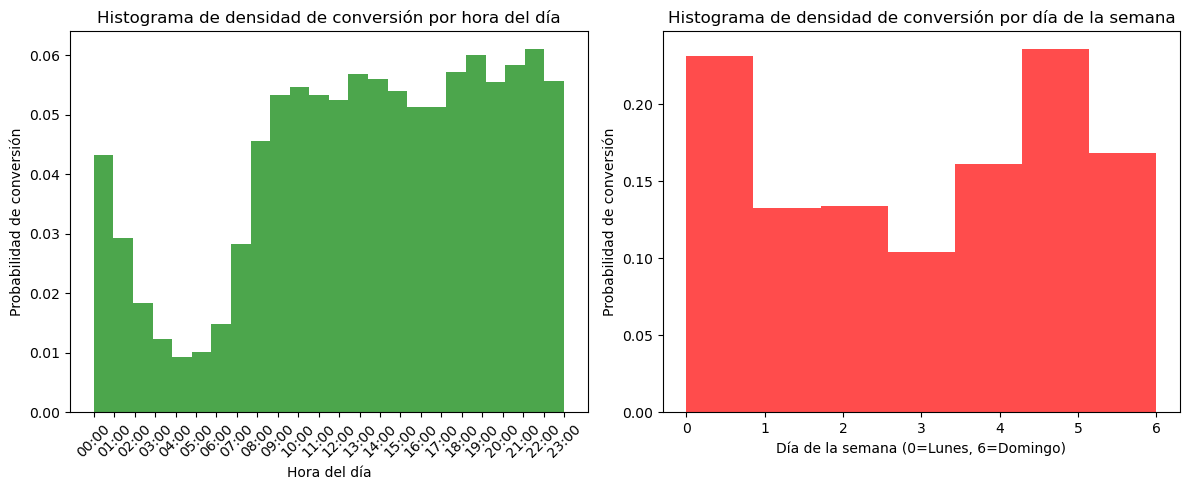

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# First subplot (left)
plt.subplot(1, 2, 1)
plt.hist(df['hour'], bins=24, color='g', alpha=0.7, density=True)
plt.title('Histograma de densidad de conversión por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Probabilidad de conversión')
plt.xticks(range(24), [f"{hour:02}:00" for hour in range(24)], rotation=45)

# Second subplot (right)
plt.subplot(1, 2, 2)
plt.hist(df['day_of_week'], bins=7, color='r', alpha=0.7, density=True)
plt.title('Histograma de densidad de conversión por día de la semana')
plt.xlabel('Día de la semana (0=Lunes, 6=Domingo)')
plt.ylabel('Probabilidad de conversión')

plt.tight_layout()
plt.show()
